In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_path = 'ViT_HSD_Norm\\Train_normalize.csv'
# dev_path = 'ViT_HSD\\dev.xlsx'
# test_path = 'ViT_HSD\\test.xlsx'

In [3]:
train = pd.read_csv(train_path)

In [4]:
individual_count = train['content'].loc[train['individual'] != 0].count()
groups_count = train['content'].loc[train['groups'] != 0].count()
religion_creed_count = train['content'].loc[train['religion/creed'] != 0].count()
race_ethnicity_count = train['content'].loc[train['race/ethnicity'] != 0].count()
politics_count = train['content'].loc[train['politics'] != 0].count()

counts = [individual_count, groups_count, religion_creed_count, race_ethnicity_count, politics_count]

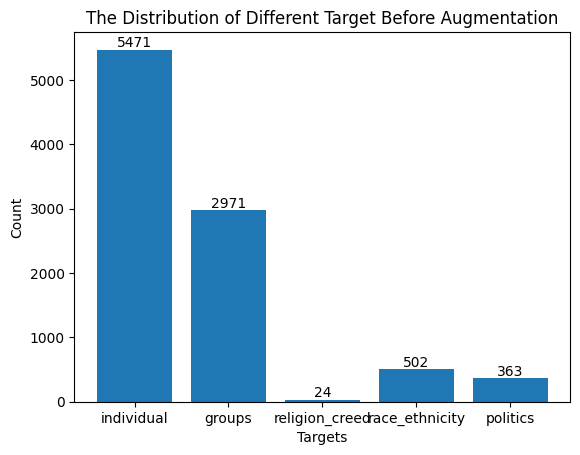

In [5]:
plt.bar(['individual', 'groups', 'religion_creed', 'race_ethnicity', 'politics'], [individual_count, groups_count, religion_creed_count, race_ethnicity_count, politics_count])
for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)
plt.xlabel('Targets')
plt.ylabel('Count')
plt.title('The Distribution of Different Target Before Augmentation')
plt.show()

In [6]:
politics = train.loc[(train['politics'] != 0)&(train['individual'] == 0)&(train['groups'] == 0)&(train['race/ethnicity'] == 0)&(train['religion/creed'] == 0)]
politics.drop(columns=['Unnamed: 0'], inplace = True)
politics.to_csv('politics.csv')

C:\Users\Phat Ma\AppData\Local\Temp\ipykernel_16096\4269480713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  politics.drop(columns=['Unnamed: 0'], inplace = True)


In [7]:
religion_creed = train.loc[(train['politics'] == 0)&(train['individual'] == 0)&(train['groups'] == 0)&(train['race/ethnicity'] == 0)&(train['religion/creed'] != 0)]
religion_creed.drop(columns=['Unnamed: 0'], inplace = True)
religion_creed.to_csv('religion_creed.csv')

C:\Users\Phat Ma\AppData\Local\Temp\ipykernel_16096\1372678877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  religion_creed.drop(columns=['Unnamed: 0'], inplace = True)


In [8]:
race_ethnicity = train.loc[(train['politics'] == 0)&(train['individual'] == 0)&(train['groups'] == 0)&(train['race/ethnicity'] != 0)&(train['religion/creed'] == 0)]
race_ethnicity.drop(columns=['Unnamed: 0'], inplace = True)
race_ethnicity.to_csv('race_ethnicity.csv')

C:\Users\Phat Ma\AppData\Local\Temp\ipykernel_16096\4076956298.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_ethnicity.drop(columns=['Unnamed: 0'], inplace = True)


In [9]:
# df = train.loc[train['politics'] != 0].reset_index(drop=True)

# # Tạo DataFrame trực tiếp từ từ điển
# output = pd.DataFrame({
#     'individual': [0] * len(df),
#     'groups': [0] * len(df),
#     'religion/creed': [0] * len(df),
#     'race/ethnicity': [0] * len(df),
#     'politics': df['politics'],
#     'sentence': df['content']
# })

# # Xuất ra tệp CSV
# output.to_csv('politics.csv', sep='\t', index=False)